# Capstone Project
## Image classifier for the SVHN dataset
### Instructions

In this notebook, you will create a neural network that classifies real-world images digits. You will use concepts from throughout this course in building, training, testing, validating and saving your Tensorflow classifier model.

This project is peer-assessed. Within this notebook you will find instructions in each section for how to complete the project. Pay close attention to the instructions as the peer review will be carried out according to a grading rubric that checks key parts of the project instructions. Feel free to add extra cells into the notebook as required.

### How to submit

When you have completed the Capstone project notebook, you will submit a pdf of the notebook for peer review. First ensure that the notebook has been fully executed from beginning to end, and all of the cell outputs are visible. This is important, as the grading rubric depends on the reviewer being able to view the outputs of your notebook. Save the notebook as a pdf (File -> Download as -> PDF via LaTeX). You should then submit this pdf for review.

### Let's get started!

We'll start by running some imports, and loading the dataset. For this project you are free to make further imports throughout the notebook as you wish. 

In [27]:
import tensorflow as tf
from scipy.io import loadmat

![SVHN overview image](data/svhn_examples.jpg)
For the capstone project, you will use the [SVHN dataset](http://ufldl.stanford.edu/housenumbers/). This is an  image dataset of over 600,000 digit images in all, and is a harder dataset than MNIST as the numbers appear in the context of natural scene images. SVHN is obtained from house numbers in Google Street View images. 

* Y. Netzer, T. Wang, A. Coates, A. Bissacco, B. Wu and A. Y. Ng. "Reading Digits in Natural Images with Unsupervised Feature Learning". NIPS Workshop on Deep Learning and Unsupervised Feature Learning, 2011.

Your goal is to develop an end-to-end workflow for building, training, validating, evaluating and saving a neural network that classifies a real-world image into one of ten classes.

In [28]:
# Run this cell to load the dataset

train = loadmat('data/train_32x32.mat')
test = loadmat('data/test_32x32.mat')

Both `train` and `test` are dictionaries with keys `X` and `y` for the input images and labels respectively.

## 1. Inspect and preprocess the dataset
* Extract the training and testing images and labels separately from the train and test dictionaries loaded for you.
* Select a random sample of images and corresponding labels from the dataset (at least 10), and display them in a figure.
* Convert the training and test images to grayscale by taking the average across all colour channels for each pixel. _Hint: retain the channel dimension, which will now have size 1._
* Select a random sample of the grayscale images and corresponding labels from the dataset (at least 10), and display them in a figure.

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [30]:
# Extract the training and testing data 

X_train = train['X']
y_train = train['y']
X_test = test['X']
y_test = test['y']

X_train = X_train / 255.0
X_test = X_test / 255.0

In [31]:
print(X_train.shape)
print(y_train.shape)


(32, 32, 3, 73257)
(73257, 1)


In [7]:
# Display random samples of color images

def display_random_samples_color(images, labels, num_samples=10):
    indices = np.random.choice(images.shape[3], num_samples, replace=False)
    plt.figure(figsize=(12, 5))
    for i, index in enumerate(indices):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[:, :, :, index])
        plt.title(f"Label: {labels[index][0]}")
        plt.axis('off')
    plt.show()

Random samples of color images:


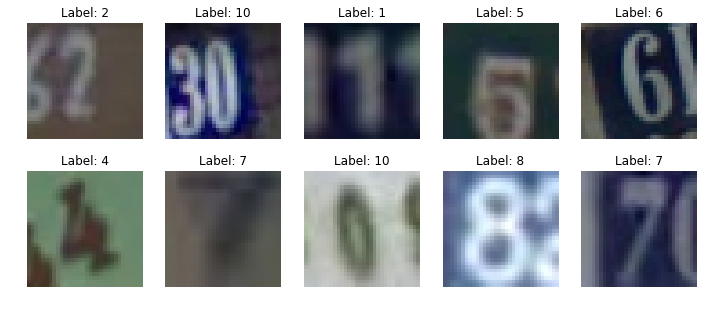

In [8]:
# Display random samples of color images

print("Random samples of color images:")
display_random_samples_color(X_train, y_train)

In [9]:
# Convert images to grayscale

X_train_gray = np.mean(X_train, axis=3, keepdims=True)
X_test_gray = np.mean(X_test, axis=3, keepdims=True)

Random samples of grayscale images:


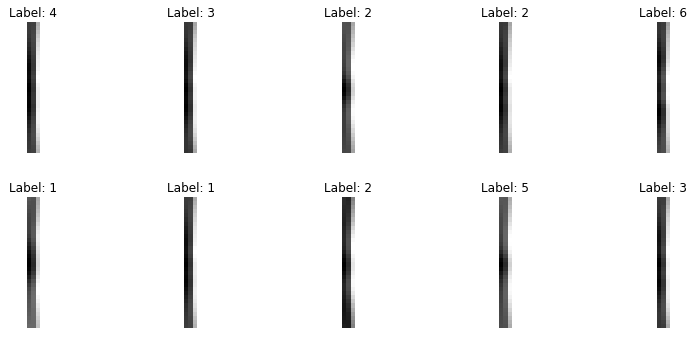

In [10]:
# Display random samples of grayscale images
print("Random samples of grayscale images:")

# Number of random samples to display (at least 10)
num_samples = 10

# Check if the number of requested samples is greater than the total number of grayscale images
if num_samples > len(X_train_gray):
    num_samples = len(X_train_gray)

# Generate random indices to select random samples
random_indices = random.sample(range(len(X_train_gray)), num_samples)

# Create a figure to display the random samples
plt.figure(figsize=(12, 5))

for i, index in enumerate(random_indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train_gray[index, :, :, 0], cmap='gray')  # Display grayscale image
    plt.title(f"Label: {y_train[index][0]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


## 2. MLP neural network classifier
* Build an MLP classifier model using the Sequential API. Your model should use only Flatten and Dense layers, with the final layer having a 10-way softmax output. 
* You should design and build the model yourself. Feel free to experiment with different MLP architectures. _Hint: to achieve a reasonable accuracy you won't need to use more than 4 or 5 layers._
* Print out the model summary (using the summary() method)
* Compile and train the model (we recommend a maximum of 30 epochs), making use of both training and validation sets during the training run. 
* Your model should track at least one appropriate metric, and use at least two callbacks during training, one of which should be a ModelCheckpoint callback.
* As a guide, you should aim to achieve a final categorical cross entropy training loss of less than 1.0 (the validation loss might be higher).
* Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
* Compute and display the loss and accuracy of the trained model on the test set.

In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [33]:
# Model designing 
def get_model(input_shape):
    model = Sequential([
        Flatten(input_shape = input_shape),
        Dense(128, activation = 'relu'),
        Dense(64, activation = 'relu'),
        Dense(10, activation = 'softmax')
    ])
    
    model.compile(optimizer = 'adam',
                  loss = 'sparse_categorical_crossentropy',
                  metrics = ['accuracy'])
    return model


In [34]:
X_train = np.transpose(X_train, (3, 0, 1, 2))
print(X_train.shape)

(73257, 32, 32, 3)


In [35]:
# Check for labels outside the range [0, 9]
invalid_labels = np.where((y_train < 0) | (y_train >= 10))

# Print the indices and values of invalid labels
print("Invalid labels:")
print("Indices:", invalid_labels[0])
print("Values:", y_train[invalid_labels])

# Replace invalid labels with valid ones or correct them
# For example, if you want to replace labels greater than or equal to 10 with 9:
y_train[y_train >= 10] = 9

Invalid labels:
Indices: [   52    84    93 ... 73193 73220 73239]
Values: [10 10 10 ... 10 10 10]


In [36]:
# Get the complied Model 

model = get_model(X_train[0].shape)

In [37]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               393344    
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 402,250
Trainable params: 402,250
Non-trainable params: 0
_________________________________________________________________


In [38]:
# Train the model (we recommend a maximum of 30 epochs), 
# making use of both training and validation sets during the training run.
# Your model should track at least one appropriate metric, 
# and use at least two callbacks during training, one of which should be a ModelCheckpoint callback.

# Earlystoppig 
early_stopping = EarlyStopping(monitor = 'val_accuracy', patience = 3, mode = 'max')

# checkpoint save weights only for every epoch
checkpoint_path = 'model_checkpoint/checkpoint'
checkpoint_path_1 = 'model_checkpoint/checkpoint/1'
checkpoint_every_epoch = ModelCheckpoint(filepath = 'checkpoint_path',
                                        freq = 'epoch',
                                        save_weights_only = True,
                                        verbose = 1)

checkpoint_best = ModelCheckpoint(filepath= 'checkpoint_path', 
                                       save_weights_only=True,        
                                       save_best_only=True,
                                       monitor='val_accuracy', 
                                       mode='max',
                                       verbose=1,)
checkpoint_best_1 = ModelCheckpoint(filepath= 'checkpoint_path_1', 
                                       save_weights_only=True,        
                                       save_best_only=True,
                                       monitor='val_accuracy', 
                                       mode='max',
                                       verbose=1,)
callbacks = [checkpoint_best, early_stopping]

In [39]:
# Training the model
history = model.fit(X_train, y_train, epochs = 10, batch_size = 128, validation_split = 0.2, callbacks = callbacks) 


Train on 58605 samples, validate on 14652 samples
Epoch 1/10
58368/58605 [============================>.] - ETA: 0s - loss: 2.1339 - accuracy: 0.2038
Epoch 00001: val_accuracy improved from -inf to 0.31914, saving model to checkpoint_path
58605/58605 [==============================] - 38s 655us/sample - loss: 2.1335 - accuracy: 0.2040 - val_loss: 1.9612 - val_accuracy: 0.3191
Epoch 2/10
58496/58605 [============================>.] - ETA: 0s - loss: 1.6283 - accuracy: 0.4239
Epoch 00002: val_accuracy improved from 0.31914 to 0.50566, saving model to checkpoint_path
58605/58605 [==============================] - 28s 476us/sample - loss: 1.6275 - accuracy: 0.4242 - val_loss: 1.4381 - val_accuracy: 0.5057
Epoch 3/10
58368/58605 [============================>.] - ETA: 0s - loss: 1.2869 - accuracy: 0.5756
Epoch 00003: val_accuracy improved from 0.50566 to 0.60954, saving model to checkpoint_path
58605/58605 [==============================] - 26s 451us/sample - loss: 1.2868 - accuracy: 0.5758

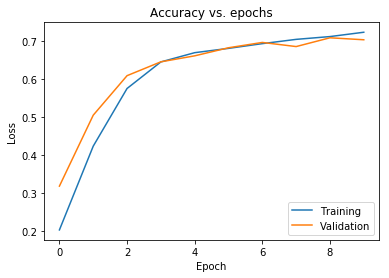

In [40]:
# plot the epoch vs accuracy graph

try:
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
except KeyError:
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

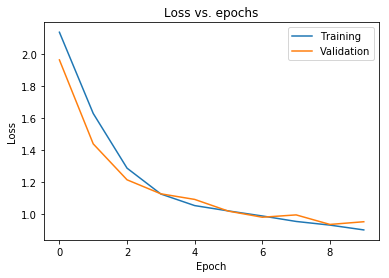

In [41]:
# plot the epoch vs loss graph

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

In [42]:
print(X_test.shape)
print(y_test.shape)


(32, 32, 3, 26032)
(26032, 1)


In [43]:
X_test = np.transpose(X_test, (3, 0, 1, 2))
print(X_test.shape)

(26032, 32, 32, 3)


In [44]:
# Check for labels outside the range [0, 9]
invalid_labels = np.where((y_test < 0) | (y_test >= 10))

# Print the indices and values of invalid labels
print("Invalid labels:")
print("Indices:", invalid_labels[0])
print("Values:", y_test[invalid_labels])

# Replace invalid labels with valid ones or correct them
# For example, if you want to replace labels greater than or equal to 10 with 9:
y_test[y_test >= 10] = 9

Invalid labels:
Indices: [    3    21    34 ... 26006 26011 26021]
Values: [10 10 10 ... 10 10 10]


In [19]:
# Evaluate the model on the test set

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print("Test loss: {:.3f}\nTest accuracy: {:.2f}%".format(test_loss, 100 * test_acc))

Test loss: 1.030
Test accuracy: 68.94%


## 3. CNN neural network classifier
* Build a CNN classifier model using the Sequential API. Your model should use the Conv2D, MaxPool2D, BatchNormalization, Flatten, Dense and Dropout layers. The final layer should again have a 10-way softmax output. 
* You should design and build the model yourself. Feel free to experiment with different CNN architectures. _Hint: to achieve a reasonable accuracy you won't need to use more than 2 or 3 convolutional layers and 2 fully connected layers.)_
* The CNN model should use fewer trainable parameters than your MLP model.
* Compile and train the model (we recommend a maximum of 30 epochs), making use of both training and validation sets during the training run.
* Your model should track at least one appropriate metric, and use at least two callbacks during training, one of which should be a ModelCheckpoint callback.
* You should aim to beat the MLP model performance with fewer parameters!
* Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
* Compute and display the loss and accuracy of the trained model on the test set.

In [45]:
# Building the CNN model
def get_conv_model(input_shape, dropout_rate):
    model = Sequential([
        Conv2D(3,(3,3), activation = 'relu', input_shape = input_shape, name = 'Conv_1'),
        MaxPooling2D((3,3), name = 'Pool_1'),
        Flatten(),
        Dense(128, activation = 'relu', name = 'Dense_1'),
        Dense(128, activation = 'relu', name = 'Dense_2'),
        Dropout(dropout_rate),
        BatchNormalization(),
        Dense(10, activation = 'softmax', name = 'Dense_6')
    ])
    
    model.compile(optimizer = 'adam',
                  loss = 'sparse_categorical_crossentropy',
                  metrics = ['accuracy'])
    return model
    

In [46]:
# Get conv_model:
conv_model = get_conv_model(X_train[0].shape, 0.2)

In [47]:
conv_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 30, 30, 3)         84        
_________________________________________________________________
Pool_1 (MaxPooling2D)        (None, 10, 10, 3)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 300)               0         
_________________________________________________________________
Dense_1 (Dense)              (None, 128)               38528     
_________________________________________________________________
Dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)              

In [48]:
# Training conv_model:
callbacks = [checkpoint_best_1, early_stopping]
history_1 = conv_model.fit(X_train, y_train, epochs = 10, batch_size = 128, validation_split = 0.2, callbacks = callbacks) 

Train on 58605 samples, validate on 14652 samples
Epoch 1/10
58496/58605 [============================>.] - ETA: 0s - loss: 1.6786 - accuracy: 0.4114
Epoch 00001: val_accuracy improved from -inf to 0.66830, saving model to checkpoint_path_1
58605/58605 [==============================] - 120s 2ms/sample - loss: 1.6772 - accuracy: 0.4119 - val_loss: 1.1522 - val_accuracy: 0.6683
Epoch 2/10
58496/58605 [============================>.] - ETA: 0s - loss: 0.8250 - accuracy: 0.7373
Epoch 00002: val_accuracy improved from 0.66830 to 0.77491, saving model to checkpoint_path_1
58605/58605 [==============================] - 102s 2ms/sample - loss: 0.8249 - accuracy: 0.7374 - val_loss: 0.7084 - val_accuracy: 0.7749
Epoch 3/10
58496/58605 [============================>.] - ETA: 0s - loss: 0.6728 - accuracy: 0.7858
Epoch 00003: val_accuracy improved from 0.77491 to 0.80733, saving model to checkpoint_path_1
58605/58605 [==============================] - 104s 2ms/sample - loss: 0.6727 - accuracy: 0.7

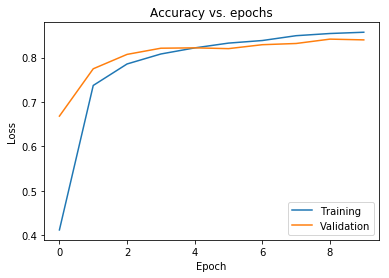

In [49]:
# plot the epoch vs accuracy graph

try:
    plt.plot(history_1.history['accuracy'])
    plt.plot(history_1.history['val_accuracy'])
except KeyError:
    plt.plot(history_1.history['acc'])
    plt.plot(history_1.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

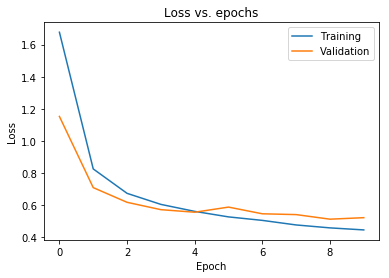

In [50]:
# plot the epoch vs loss graph

plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

In [51]:
# Evaluate the model on the test set

test_loss, test_acc = conv_model.evaluate(X_test, y_test, verbose=0)
print("Test loss: {:.3f}\nTest accuracy: {:.2f}%".format(test_loss, 100 * test_acc))

Test loss: 0.588
Test accuracy: 82.39%


## 4. Get model predictions
* Load the best weights for the MLP and CNN models that you saved during the training run.
* Randomly select 5 images and corresponding labels from the test set and display the images with their labels.
* Alongside the image and label, show each model’s predictive distribution as a bar chart, and the final model prediction given by the label with maximum probability.

In [52]:
# Creating the new MLP and CNN models 
new_model = get_model(X_train[0].shape)
new_conv_model = get_conv_model(X_train[0].shape, 0.2)


print(new_model.summary())
print(new_conv_model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               393344    
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                650       
Total params: 402,250
Trainable params: 402,250
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 30, 30, 3)         84        
_____________________

In [ ]:
#Load the weights 
new_model = load_model(checkpoint_path)
new_conv_model = load_model('model_checkpoint/checkpoint/1')

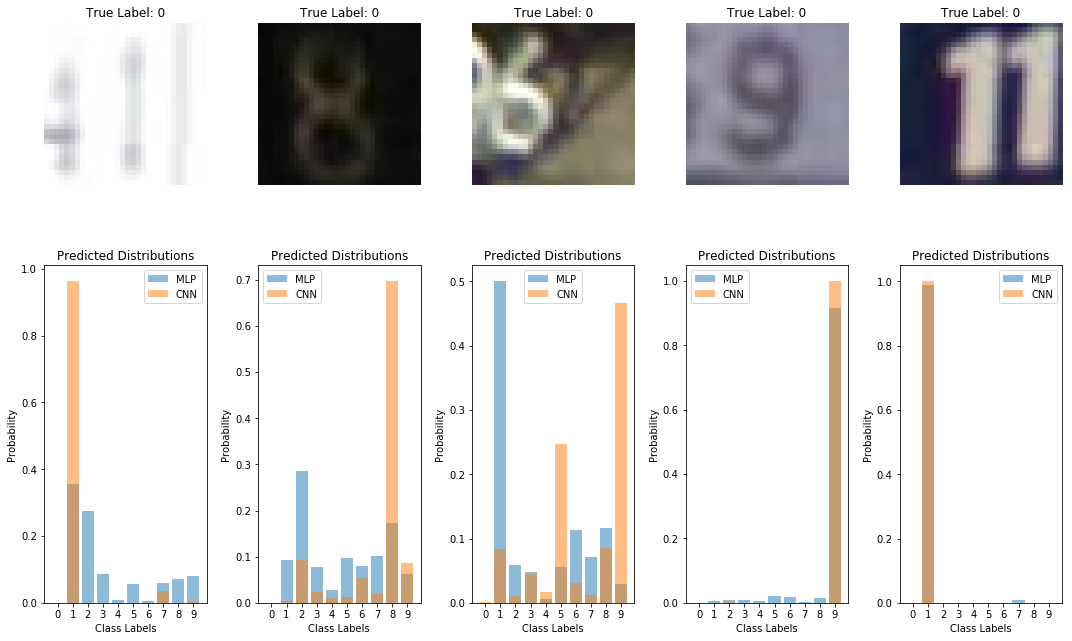

In [60]:
# Randomly select 5 images and labels from the test set
num_samples = 5
random_indices = np.random.choice(len(X_test), num_samples, replace=False)
sample_images = X_test[random_indices]
sample_labels = y_test[random_indices]

# Use the models to make predictions on the sample images
mlp_predictions = new_model.predict(sample_images)
cnn_predictions = new_conv_model.predict(sample_images)

# Define class labels (assuming 0-9 for this example)
class_labels = [str(i) for i in range(10)]

# Display the sample images with true labels, predicted distributions, and final predictions
plt.figure(figsize=(15, 10))


for i in range(num_samples):
    plt.subplot(2, num_samples, i + 1)
    plt.imshow(sample_images[i], cmap='gray')
    true_label = class_labels[sample_labels[i].argmax()]  # Convert integer label to string
    plt.title(f"True Label: {true_label}")
    plt.axis('off')

    plt.subplot(2, num_samples, i + 1 + num_samples)
    plt.bar(class_labels, mlp_predictions[i], alpha=0.5, label='MLP')
    plt.bar(class_labels, cnn_predictions[i], alpha=0.5, label='CNN')
    plt.title("Predicted Distributions")
    plt.xlabel("Class Labels")
    plt.ylabel("Probability")
    plt.legend()

plt.tight_layout()
plt.show()